In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif
%matplotlib inline
import statsmodels.api as sm
from scipy.stats.mstats import winsorize
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('C:\\Users\\Square Bear\\Documents\\Thinkful\\Datasets\\2008_001.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70097 entries, 0 to 70096
Data columns (total 30 columns):
Unnamed: 0           70097 non-null int64
Year                 70097 non-null int64
Month                70097 non-null int64
DayofMonth           70097 non-null int64
DayOfWeek            70097 non-null int64
DepTime              68738 non-null float64
CRSDepTime           70097 non-null int64
ArrTime              68587 non-null float64
CRSArrTime           70097 non-null int64
UniqueCarrier        70097 non-null object
FlightNum            70097 non-null int64
TailNum              69261 non-null object
ActualElapsedTime    68553 non-null float64
CRSElapsedTime       70089 non-null float64
AirTime              68553 non-null float64
ArrDelay             68553 non-null float64
DepDelay             68738 non-null float64
Origin               70097 non-null object
Dest                 70097 non-null object
Distance             70097 non-null int64
TaxiIn               68587 non-nu

In [4]:
pd.options.display.max_columns = None
df.head(10)


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4322341,2008,8,29,5,2050.0,2050,2230.0,2240,WN,113,N405WN,100.0,110.0,87.0,-10.0,0.0,OAK,PHX,646,5.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,4686059,2008,8,2,6,1838.0,1840,2159.0,2206,NW,1274,N331NW,141.0,146.0,116.0,-7.0,-2.0,MSP,RDU,981,9.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,6762380,2008,12,4,4,2032.0,2011,2049.0,2033,EV,5283,N855AS,77.0,82.0,57.0,16.0,21.0,ATL,JAN,341,3.0,17.0,0,NaN,0,0.0,0.0,0.0,0.0,16.0
3,3937352,2008,7,16,3,1620.0,1615,1712.0,1700,EV,4242,N867AS,112.0,105.0,74.0,12.0,5.0,FLL,PNS,525,6.0,32.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,491263,2008,1,16,3,1440.0,1430,1652.0,1650,AA,725,N5DHAA,192.0,200.0,166.0,2.0,10.0,MIA,ORD,1197,10.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,5030793,2008,9,25,4,2058.0,2100,2338.0,2348,OO,6702,N944SW,100.0,108.0,84.0,-10.0,-2.0,DEN,FAR,627,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,6662859,2008,12,22,1,NaN,618,NaN,803,UA,73,NaN,NaN,105.0,NaN,NaN,NaN,SAN,SFO,447,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
7,4267653,2008,8,13,3,1037.0,1035,1254.0,1310,WN,2900,N217JC,137.0,155.0,121.0,-16.0,2.0,FLL,BWI,925,3.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,1166159,2008,2,7,4,1018.0,1020,1203.0,1213,DL,1125,N688DL,105.0,113.0,79.0,-10.0,-2.0,ATL,PBI,545,7.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2326672,2008,4,3,4,943.0,945,1215.0,1150,B6,1123,N284JB,152.0,125.0,99.0,25.0,-2.0,CLT,FLL,631,5.0,48.0,0,NaN,0,0.0,0.0,25.0,0.0,0.0


Name 	            Description
1 	Year 	            1987-2008
2 	Month 	            1-12
3 	DayofMonth 	        1-31
4 	DayOfWeek 	        1 (Monday) - 7 (Sunday)
5 	DepTime 	        actual departure time (local, hhmm)
6 	CRSDepTime 	        scheduled departure time (local, hhmm)
7 	ArrTime 	        actual arrival time (local, hhmm)
8 	CRSArrTime 	        scheduled arrival time (local, hhmm)
9 	UniqueCarrier 	    unique carrier code
10 	FlightNum 	        flight number
11 	TailNum 	        plane tail number
12 	ActualElapsedTime 	in minutes
13 	CRSElapsedTime 	    in minutes
14 	AirTime 	        in minutes
15 	ArrDelay 	        arrival delay, in minutes
16 	DepDelay 	        departure delay, in minutes
17 	Origin 	            origin IATA airport code
18 	Dest 	            destination IATA airport code
19 	Distance 	        in miles
20 	TaxiIn 	            taxi in time, in minutes
21 	TaxiOut 	        taxi out time in minutes
22 	Cancelled 	        was the flight cancelled?
23 	CancellationCode 	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24 	Diverted 	        1 = yes, 0 = no
25 	CarrierDelay 	    in minutes
26 	WeatherDelay 	    in minutes
27 	NASDelay 	        in minutes
28 	SecurityDelay 	    in minutes
29 	LateAircraftDelay 	in minutes

In [5]:
df['DayOfWeek'].value_counts().head()

1    10600
5    10449
3    10356
2    10195
4    10189
Name: DayOfWeek, dtype: int64

In [6]:
df['DepTime'].value_counts().head()

555.0    190
600.0    182
700.0    156
655.0    149
558.0    136
Name: DepTime, dtype: int64

In [7]:
df['ArrTime'].value_counts().head()

1216.0    108
1825.0    106
1410.0    103
1749.0    101
1536.0     99
Name: ArrTime, dtype: int64

In [8]:
df['UniqueCarrier'].value_counts()

WN    11994
AA     5926
OO     5731
MQ     4972
UA     4533
DL     4482
US     4434
XE     3752
NW     3452
CO     3095
EV     2779
9E     2617
FL     2607
YV     2589
B6     1997
OH     1964
AS     1528
F9      942
HA      613
AQ       90
Name: UniqueCarrier, dtype: int64

In [9]:
df = df.fillna(df.mean())



In [10]:
#df = df.fillna(df.mode()[0])

In [11]:
df.isna().sum()

Unnamed: 0               0
Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                  0
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                836
ActualElapsedTime        0
CRSElapsedTime           0
AirTime                  0
ArrDelay                 0
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                   0
TaxiOut                  0
Cancelled                0
CancellationCode     68724
Diverted                 0
CarrierDelay             0
WeatherDelay             0
NASDelay                 0
SecurityDelay            0
LateAircraftDelay        0
dtype: int64

In [12]:
df.isna().sum()/len(df)


Unnamed: 0           0.000000
Year                 0.000000
Month                0.000000
DayofMonth           0.000000
DayOfWeek            0.000000
DepTime              0.000000
CRSDepTime           0.000000
ArrTime              0.000000
CRSArrTime           0.000000
UniqueCarrier        0.000000
FlightNum            0.000000
TailNum              0.011926
ActualElapsedTime    0.000000
CRSElapsedTime       0.000000
AirTime              0.000000
ArrDelay             0.000000
DepDelay             0.000000
Origin               0.000000
Dest                 0.000000
Distance             0.000000
TaxiIn               0.000000
TaxiOut              0.000000
Cancelled            0.000000
CancellationCode     0.980413
Diverted             0.000000
CarrierDelay         0.000000
WeatherDelay         0.000000
NASDelay             0.000000
SecurityDelay        0.000000
LateAircraftDelay    0.000000
dtype: float64

In [13]:
df.TailNum.nunique()
df.TailNum.mode()[0]
df['TailNum'] = df['TailNum'].fillna( df.TailNum.mode()[0] )
df.isna().sum()/len(df)
df = df.drop(['CancellationCode'], axis = 1)
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4322341,2008,8,29,5,2050.0,2050,2230.0,2240,WN,113,N405WN,100.0,110.0,87.0,-10.0,0.0,OAK,PHX,646,5.0,8.0,0,0,15.439401,3.150961,16.660176,0.062195,20.617128
1,4686059,2008,8,2,6,1838.0,1840,2159.0,2206,NW,1274,N331NW,141.0,146.0,116.0,-7.0,-2.0,MSP,RDU,981,9.0,16.0,0,0,15.439401,3.150961,16.660176,0.062195,20.617128
2,6762380,2008,12,4,4,2032.0,2011,2049.0,2033,EV,5283,N855AS,77.0,82.0,57.0,16.0,21.0,ATL,JAN,341,3.0,17.0,0,0,0.000000,0.000000,0.000000,0.000000,16.000000
3,3937352,2008,7,16,3,1620.0,1615,1712.0,1700,EV,4242,N867AS,112.0,105.0,74.0,12.0,5.0,FLL,PNS,525,6.0,32.0,0,0,15.439401,3.150961,16.660176,0.062195,20.617128
4,491263,2008,1,16,3,1440.0,1430,1652.0,1650,AA,725,N5DHAA,192.0,200.0,166.0,2.0,10.0,MIA,ORD,1197,10.0,16.0,0,0,15.439401,3.150961,16.660176,0.062195,20.617128


In [14]:
numeric = df.select_dtypes(exclude = ['object'])
#numeric.plot(kind='hist')
obj = df.select_dtypes(include = ['object'])


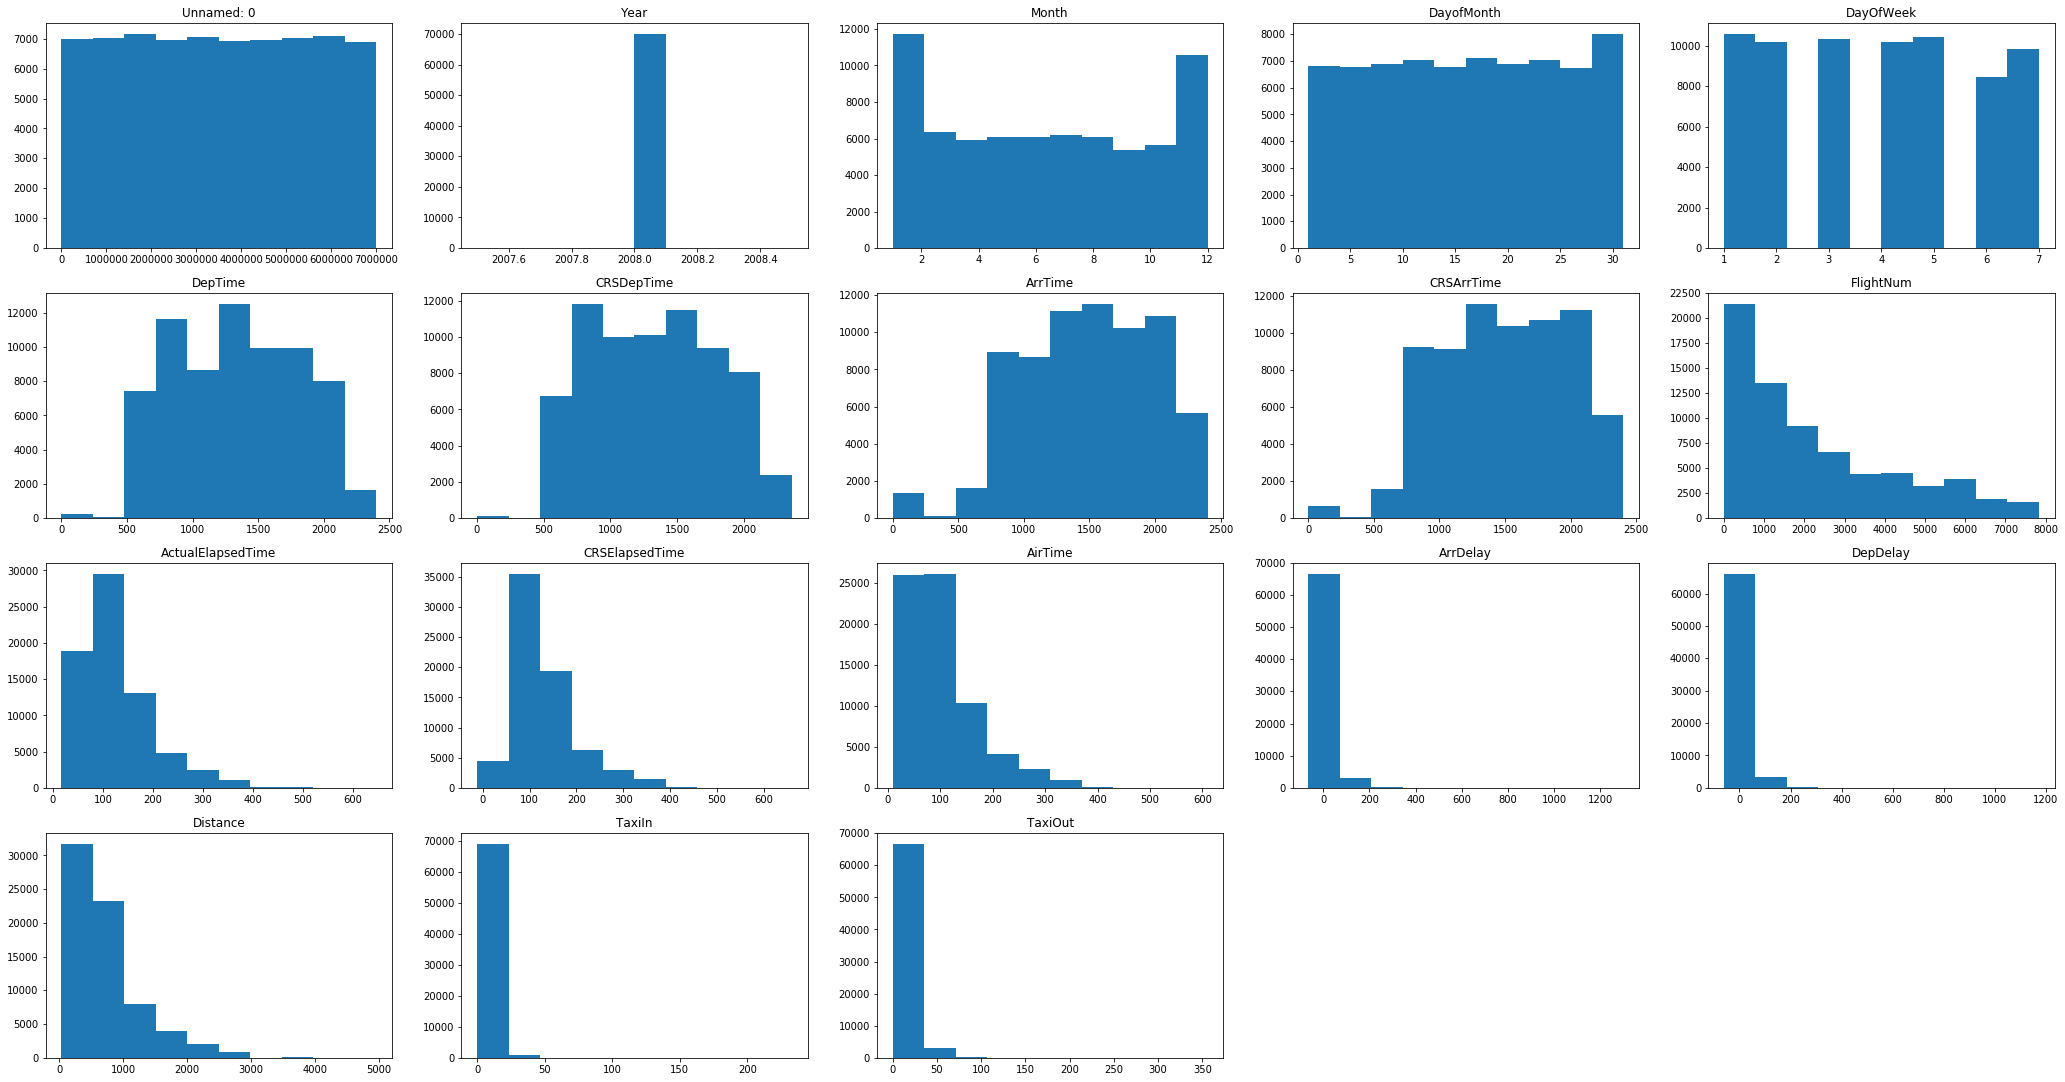

In [15]:
import itertools 
import matplotlib.gridspec as gridspec

label = numeric.columns.tolist() # 18 
clf_list = list(range(0, 18) ) 

fig = plt.figure(figsize=(36, 24)) 
gs = gridspec.GridSpec(5, 5) 
grid = itertools.product([0,1, 2, 3, 4 ],repeat=2)

print (grid)

for clf, label, grd in zip(clf_list, label, grid):

 #plt.subplot(3, 3, 3)
 ax = plt.subplot(gs[grd[0], grd[1]])
 plt.hist(numeric[label])
 plt.title(label)

plt.show()


In [16]:
from scipy.stats.mstats import winsorize
numeric['TaxiOut'] = winsorize(numeric['TaxiOut'], (0, 0.10))
numeric['TaxiIn'] = winsorize(numeric['TaxiIn'], (0, 0.10))
numeric['ArrDelay'] = winsorize(numeric['ArrDelay'], (0, 0.10))
numeric['DepDelay'] = winsorize(numeric['DepDelay'], (0, 0.10))
numeric['Distance'] = winsorize(numeric['Distance'], (0, 0.10))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

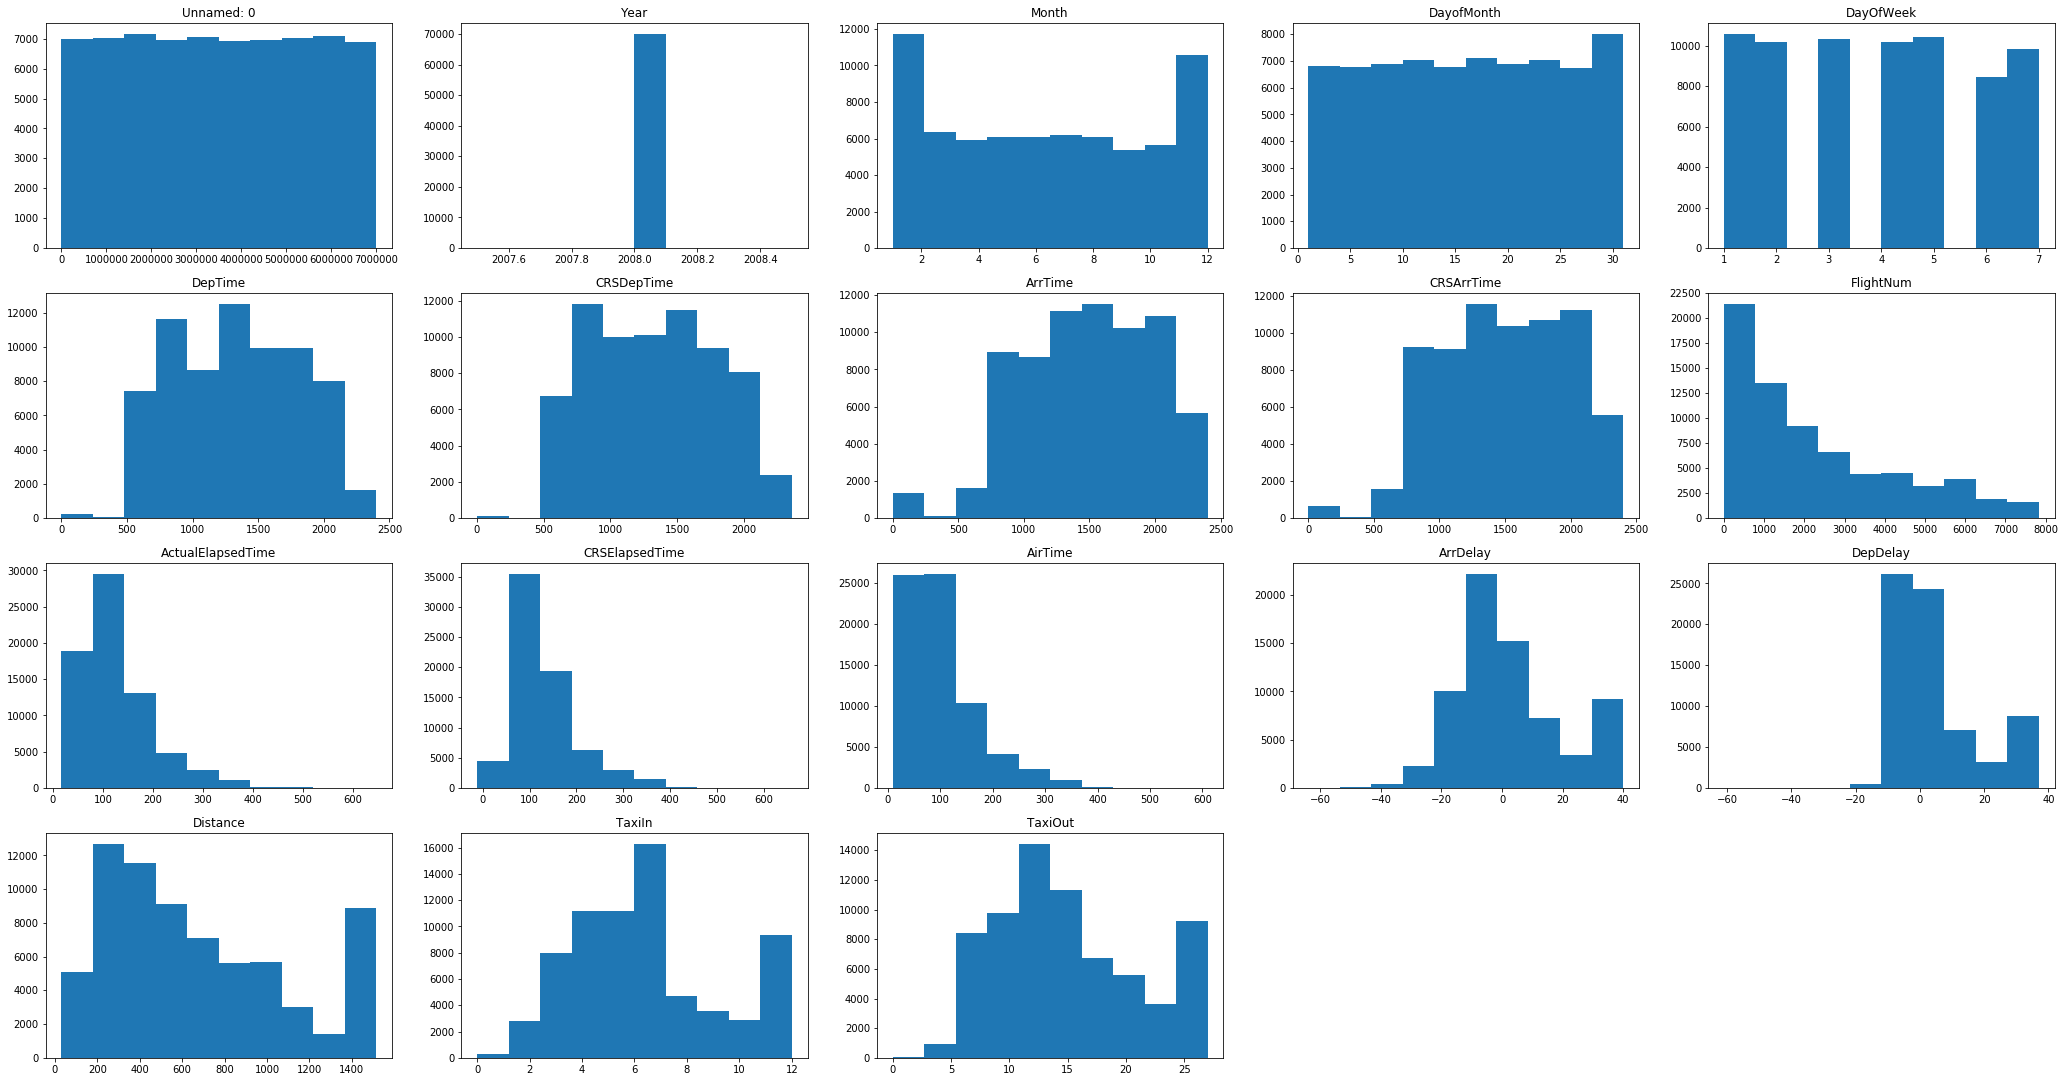

In [17]:
import itertools 
import matplotlib.gridspec as gridspec

label = numeric.columns.tolist() 
clf_list = list(range(0, 18) ) 

fig = plt.figure(figsize=(36, 24)) 
gs = gridspec.GridSpec(5, 5) 
grid = itertools.product([0,1, 2, 3, 4 ],repeat=2)

print (grid)

for clf, label, grd in zip(clf_list, label, grid):

 #plt.subplot(3, 3, 3)
 ax = plt.subplot(gs[grd[0], grd[1]])
 plt.hist(numeric[label])
 plt.title(label)

plt.show()


In [18]:
from sklearn import preprocessing
obj0 = obj.apply(preprocessing.LabelEncoder().fit_transform)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

obj1 = scaler.fit_transform(obj0)
obj2 = pd.DataFrame(obj1)


print(obj2.head())

          0         1         2         3
0  1.000414 -0.576664  0.692756  0.887234
1  0.150558 -0.920009  0.629867  1.090247
2 -0.699298  1.204191 -1.621555 -0.013638
3 -0.699298  1.218886 -0.552444  0.963364
4 -1.719125  0.138751  0.466356  0.760350


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [ ]:
df = pd.concat([numeric, obj2], axis = 1)
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,0,1,2,3
0,4322341,2008,8,29,5,2050.0,2050,2230.0,2240,113,100.0,110.0,87.0,-10.0,0.0,646,5.0,8.0,0,0,15.439401,3.150961,16.660176,0.062195,20.617128,1.000414,-0.576664,0.692756,0.887234
1,4686059,2008,8,2,6,1838.0,1840,2159.0,2206,1274,141.0,146.0,116.0,-7.0,-2.0,981,9.0,16.0,0,0,15.439401,3.150961,16.660176,0.062195,20.617128,0.150558,-0.920009,0.629867,1.090247
2,6762380,2008,12,4,4,2032.0,2011,2049.0,2033,5283,77.0,82.0,57.0,16.0,21.0,341,3.0,17.0,0,0,0.000000,0.000000,0.000000,0.000000,16.000000,-0.699298,1.204191,-1.621555,-0.013638
3,3937352,2008,7,16,3,1620.0,1615,1712.0,1700,4242,112.0,105.0,74.0,12.0,5.0,525,6.0,27.0,0,0,15.439401,3.150961,16.660176,0.062195,20.617128,-0.699298,1.218886,-0.552444,0.963364
4,491263,2008,1,16,3,1440.0,1430,1652.0,1650,725,192.0,200.0,166.0,2.0,10.0,1197,10.0,16.0,0,0,15.439401,3.150961,16.660176,0.062195,20.617128,-1.719125,0.138751,0.466356,0.760350


In [ ]:
df[df.columns.tolist()] = df[df.columns.tolist()].astype(float)

print(df.dtypes)

Unnamed: 0           float64
Year                 float64
Month                float64
DayofMonth           float64
DayOfWeek            float64
DepTime              float64
CRSDepTime           float64
ArrTime              float64
CRSArrTime           float64
FlightNum            float64
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled            float64
Diverted             float64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
0                    float64
1                    float64
2                    float64
3                    float64
dtype: object


In [ ]:


df = df.fillna(df.mean())
print(df.isna().sum()/len(df))

Unnamed: 0           0.0
Year                 0.0
Month                0.0
DayofMonth           0.0
DayOfWeek            0.0
DepTime              0.0
CRSDepTime           0.0
ArrTime              0.0
CRSArrTime           0.0
FlightNum            0.0
ActualElapsedTime    0.0
CRSElapsedTime       0.0
AirTime              0.0
ArrDelay             0.0
DepDelay             0.0
Distance             0.0
TaxiIn               0.0
TaxiOut              0.0
Cancelled            0.0
Diverted             0.0
CarrierDelay         0.0
WeatherDelay         0.0
NASDelay             0.0
SecurityDelay        0.0
LateAircraftDelay    0.0
0                    0.0
1                    0.0
2                    0.0
3                    0.0
dtype: float64


In [ ]:

X = df.drop(['Cancelled', 'Unnamed: 0', 'Diverted'], 1)
y = df.Cancelled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.columns)

Index([             'Year',             'Month',        'DayofMonth',
               'DayOfWeek',           'DepTime',        'CRSDepTime',
                 'ArrTime',        'CRSArrTime',         'FlightNum',
       'ActualElapsedTime',    'CRSElapsedTime',           'AirTime',
                'ArrDelay',          'DepDelay',          'Distance',
                  'TaxiIn',           'TaxiOut',      'CarrierDelay',
            'WeatherDelay',          'NASDelay',     'SecurityDelay',
       'LateAircraftDelay',                   0,                   1,
                         2,                   3],
      dtype='object')


In [ ]:
#Pipeline Construction.
anova = SelectKBest(f_classif, k=3)
svm = SVC(kernel='rbf')
anova_svm = make_pipeline(anova, svm)

#Fitting & Cross-Validation.
anova_svm.fit(X_train,y_train)
scores = cross_val_score(anova_svm, X_test, y_test, cv=2)

#De-Masking Selected Features.
features = anova.get_support(indices=True)
feature_names = list(X_test.columns)
selected_features = []
for feature in features:
    selected_features.append(feature_names[feature])

#Printing Outcomes.
print('Cross-Validation Scores: {}\n'.format(scores))
print('Cross-Validation Score Averaged Across Folds: {:.2%}.\n'.format(scores.mean()))
print('Selected Features: {}\n'.format(selected_features))



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [0] are constant.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
LinearSVC_classifier = SklearnClassifier(SVC(kernel='linear',probability=True))

prob_Y = clf.predict_proba(X_test)
prob_Y = [p[1] for p in prob_Y]
print('AUROC Score: {:.2%}.'.format(roc_auc_score(y_test, prob_Y)))